## 1. Regression discontinuity: banking recovery

In [7]:
# Import modules
import pandas as pd
import numpy as np
# Read in dataset
df = pd.read_csv("datasets/bank_data.csv")
# Print the first few rows of the DataFrame
df.head()
print('hello')

hello


## 2. Graphical exploratory data analysis


No handles with labels found to put in legend.


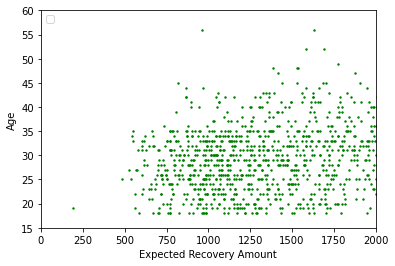

In [3]:
# Scatter plot of Age vs. Expected Recovery Amount
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(x=df['expected_recovery_amount'], y=df['age'], c="g", s=2)
plt.xlim(0, 2000)
plt.ylim(15, 60)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.legend(loc=2)
# ... YOUR CODE FOR TASK 2 ...

## 3. Statistical test:  age vs. expected recovery amount

In [5]:
# Import stats module
from scipy import stats

# Compute average age just below and above the threshold
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]
by_recovery_strategy = era_900_1100.groupby(['recovery_strategy'])
by_recovery_strategy['age'].describe().unstack()

# Perform Kruskal-Wallis test 
Level_0_age = era_900_1100.loc[df['recovery_strategy']=="Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy']=="Level 1 Recovery"]['age']
stats.kruskal(Level_0_age, Level_1_age) 

KruskalResult(statistic=3.4572342749517513, pvalue=0.06297556896097407)

## 4. Statistical test:  sex vs. expected recovery amount


In [6]:
# Number of customers in each category
crosstab = pd.crosstab(df.loc[(df['...']<...) & 
                              (df['...']>=...)]['recovery_strategy'], 
                       df['sex'])
# ... YOUR CODE FOR TASK 4 ...

# Chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(...)
# ... YOUR CODE FOR TASK 4 ...

KeyError: '...'

## 5. Exploratory graphical analysis: recovery amount

In [ ]:
# Scatter plot of Actual Recovery Amount vs. Expected Recovery Amount 
plt.scatter(x=df['...'], y=df['...'], c="g", s=2)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("...")
plt.ylabel("...")
plt.legend(loc=2)
# ... YOUR CODE FOR TASK 5 ...

## 6. Statistical analysis:  recovery amount

In [ ]:
# Compute average actual recovery amount just below and above the threshold
by_recovery_strategy['actual_recovery_amount'].describe().unstack()

# Perform Kruskal-Wallis test
... = era_900_1100.loc[df['recovery_strategy']=='Level 0 Recovery']['actual_recovery_amount']
... = era_900_1100.loc[df['recovery_strategy']=='Level 1 Recovery']['actual_recovery_amount']
stats.kruskal(...,...) 

# Repeat for a smaller range of $950 to $1050
era_950_1050 = df.loc[(df['expected_recovery_amount']<...) & 
                      (df['expected_recovery_amount']>=...)]
Level_0_actual = ...
Level_1_actual = ...
# ... YOUR CODE FOR TASK 6 ...

## 7. Regression modeling: no threshold

In [ ]:
# Import statsmodels
import statsmodels.api as sm

# Define X and y
X = ...
y = ...
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the model summary statistics
# ... YOUR CODE FOR TASK 7 ...

## 8. Regression modeling: adding true threshold

In [ ]:
# Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['...']<..., 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = ...
y = ...
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
# ... YOUR CODE FOR TASK 8 ...

## 9. Regression modeling: adjusting the window

In [ ]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['...']<...) & 
                      (df['...']>=...)]

# Define X and y 
X = ...[['expected_recovery_amount','indicator_1000']]
y = ...['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()